In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from scipy.stats import norm
from numpy.random import rand, randn, randint

In [3]:
no_movie = 20
no_user = 40
no_movie_per_user = 8

In [4]:
# 취향의 중심이 mark인 사람이 i번째 영화를 보면 주는 점수 시뮬레이션 값
def get_score(i,mark):
    return (1.5+10*norm().pdf((i-mark)/5)).astype(int)
get_score(10,10)

5

In [5]:
get_score(7,10)

4

In [6]:
get_score(5,10)

3

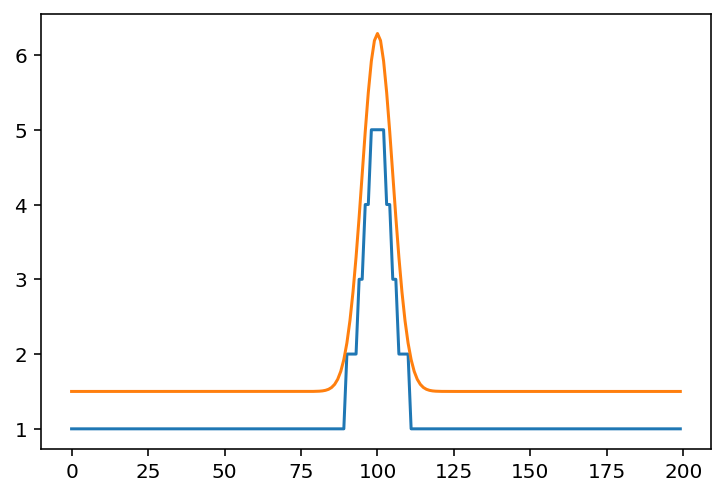

In [7]:
i = np.arange(200)
mark = 100
plt.plot(get_score(i,mark))
plt.plot((1.5+12*norm().pdf((i-mark)/5)))

In [8]:
# 학습 데이터
data = []
# user-id가 적은 번호의 사람이 작은 값의 영화를 좋아한다고 가정함
ratio = no_user/no_movie
for user in range(no_user):
    mark= int(user/ratio)
    # 영화를 랜덤하게 8편 선택했을 때의 점수 계산
    movie = randint(0,no_movie,no_movie_per_user)
    for i in movie:
        data.append((user, i, get_score(i, mark)))

In [9]:
# 40명의 고객이 20종의 영화중에 각각 임의로 8편의 영화를 본 후의 점수 테이블 (320 샘플)
df = pd.DataFrame(data, columns=['user', 'movie', 'score'])
print(df.shape)
df

(320, 3)


,user,movie,score
0,0,2,5
1,0,6,3
2,0,7,2
3,0,19,1
4,0,13,1
...,...,...,...
315,39,5,1
316,39,8,1
317,39,19,5
318,39,17,5


In [10]:
df.score.value_counts().sort_index()

1    74
2    59
3    47
4    58
5    82
Name: score, dtype: int64

In [11]:
user_movie_rating = df.pivot_table('score', index = 'user', columns='movie')
user_movie_rating

movie,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
user,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,5.0,4.0,NaN,NaN,3.0,2.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0
1,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0
2,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN,2.0,2.0,2.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
4,5.0,5.0,NaN,NaN,NaN,4.0,4.0,NaN,NaN,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,1.0,NaN
6,4.0,NaN,5.0,NaN,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0
7,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN,1.0
8,NaN,4.0,5.0,NaN,NaN,NaN,5.0,NaN,NaN,3.0,NaN,2.0,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN


In [12]:
movie_user_rating = user_movie_rating.T


In [13]:
movie_user_rating.fillna(0, inplace = True)
movie_user_rating.head(3)

user,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
movie,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,5.0,5.0,4.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,5.0,0.0,5.0,0.0,0.0,5.0,4.0,4.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.metrics.pairwise import cosine_similarity
item_based_collabor = cosine_similarity(movie_user_rating)
print(item_based_collabor.shape)
item_based_collabor[:3]

(20, 20)


array([[1.        , 0.24168877, 0.29504842, 0.40694606, 0.07042382,
        0.24987003, 0.46170712, 0.17387512, 0.41816411, 0.28082212,
        0.14038564, 0.17915214, 0.1832301 , 0.24418146, 0.17001728,
        0.22880216, 0.21569899, 0.1891336 , 0.1692569 , 0.10895897],
       [0.24168877, 1.        , 0.28876104, 0.20399409, 0.32780503,
        0.36768389, 0.30203985, 0.23035194, 0.1575696 , 0.47171275,
        0.25369608, 0.11371471, 0.08187741, 0.15786151, 0.19424963,
        0.13693064, 0.12717639, 0.02817181, 0.1575696 , 0.0829925 ],
       [0.29504842, 0.28876104, 1.        , 0.38791456, 0.05540916,
        0.30440777, 0.47126818, 0.16837442, 0.20367271, 0.37465377,
        0.20791498, 0.15377035, 0.0461327 , 0.1494274 , 0.15201009,
        0.11572751, 0.1923392 , 0.05357143, 0.07050209, 0.23380488]])

In [15]:
item_based_collabor = pd.DataFrame(data = item_based_collabor, index = movie_user_rating.index, columns = movie_user_rating.index)
item_based_collabor[:3]

movie,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
movie,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.241689,0.295048,0.406946,0.070424,0.249870,0.461707,0.173875,0.418164,0.280822,0.140386,0.179152,0.183230,0.244181,0.170017,0.228802,0.215699,0.189134,0.169257,0.108959
1,0.241689,1.000000,0.288761,0.203994,0.327805,0.367684,0.302040,0.230352,0.157570,0.471713,0.253696,0.113715,0.081877,0.157862,0.194250,0.136931,0.127176,0.028172,0.157570,0.082993
2,0.295048,0.288761,1.000000,0.387915,0.055409,0.304408,0.471268,0.168374,0.203673,0.374654,0.207915,0.153770,0.046133,0.149427,0.152010,0.115728,0.192339,0.053571,0.070502,0.233805


In [19]:
def get_item_based_collabor(title):
    return item_based_collabor[title].sort_values(ascending=False)[1:10]

In [20]:
get_item_based_collabor(15)

movie
17    0.514344
13    0.386207
16    0.366618
19    0.336718
18    0.304604
7     0.284164
3     0.272680
8     0.253837
0     0.228802
Name: 15, dtype: float64